<a href="https://colab.research.google.com/github/gnoejh/ict1022/blob/main/Components/attention_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Components of Neural Networks

## Understanding Attention Mechanism by Example

In this notebook, we will illustrate a simplified version of the attention mechanism. The main ideas are:

1. **Self-Attention on X:** The input data points (X) are embedded in a high-dimensional space. Using self-attention, the mechanism computes the relationships among these points so that similar (or related) points are drawn closer together while unrelated points are pushed apart.

2. **Cross-Attention for Y:** When new points (Y) are introduced, cross-attention helps to align these new points with the clusters formed by X. In other words, the new points are positioned near the related groups in the embedding space.

This is a key point of the attention mechanism: it dynamically repositions points based on similarity, enhancing the representation of related information.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

# For reproducibility
np.random.seed(42)

def plot_embeddings(embeddings, labels, title):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.colorbar(scatter)
    plt.grid(True)
    plt.show()

# A simple attention function
def self_attention(X):
    # Here, we use X as Query, Key, and Value
    Q = X
    K = X
    V = X
    
    # Compute similarity scores (dot product)
    scores = Q @ K.T
    
    # Compute attention weights using softmax
    attn_weights = softmax(scores, axis=-1)
    
    # New representations
    X_new = attn_weights @ V
    return X_new, attn_weights

def cross_attention(Y, X):
    # In cross-attention, Y is the Query and X provides the Key and Value
    Q = Y
    K = X
    V = X
    
    # Compute similarity scores between Y and X
    scores = Q @ K.T
    
    # Compute attention weights using softmax
    attn_weights = softmax(scores, axis=-1)
    
    # New representations for Y based on related X
    Y_new = attn_weights @ V
    return Y_new, attn_weights

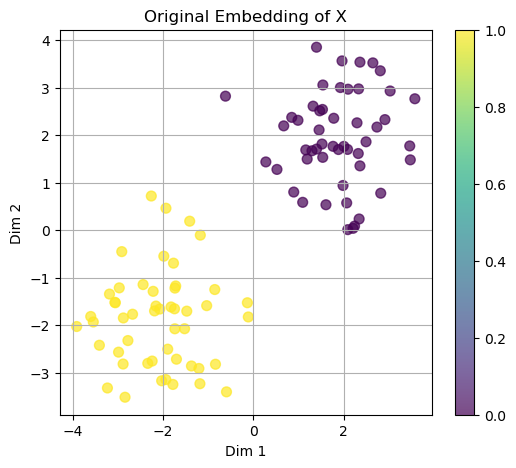

In [2]:
# Create synthetic data for X
# We'll simulate two clusters in 2D
cluster1 = np.random.randn(50, 2) + np.array([2, 2])
cluster2 = np.random.randn(50, 2) + np.array([-2, -2])
X = np.vstack([cluster1, cluster2])
labels_X = np.array([0]*50 + [1]*50)

# Plot the original embeddings of X
plot_embeddings(X, labels_X, 'Original Embedding of X')

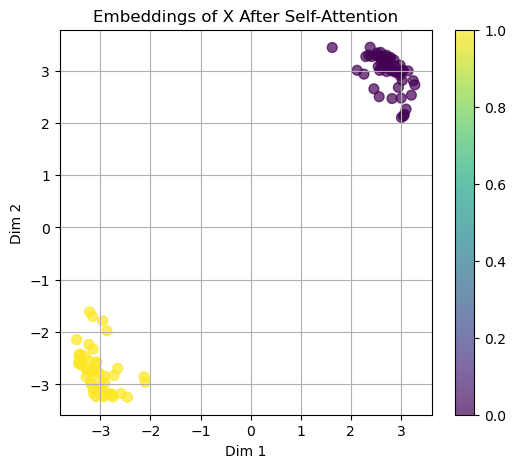

In [3]:
# Apply self-attention on X
X_new, attn_weights = self_attention(X)

# Plot the new embeddings after self-attention
plot_embeddings(X_new, labels_X, 'Embeddings of X After Self-Attention')

# Note: In this simplified example, because we use the same X for Q, K, and V,
# the changes might be subtle. In a trained model, self-attention helps
# to amplify relationships and may re-position the embeddings in a more meaningful way.

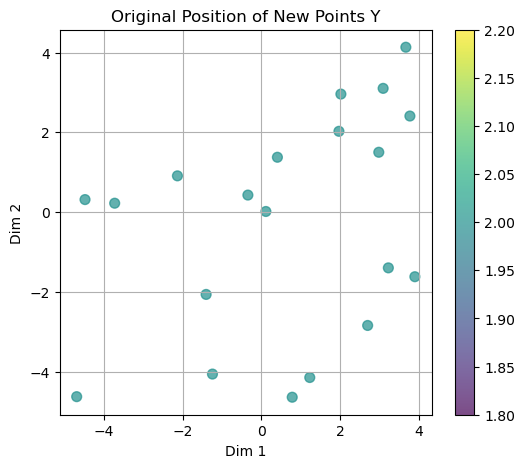

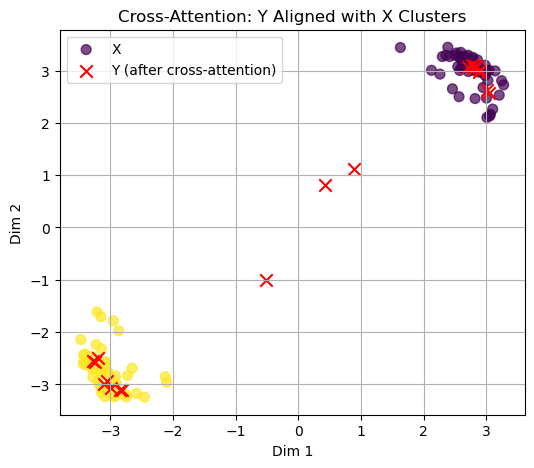

In [4]:
# Create new points Y that are initially randomly distributed
Y = np.random.uniform(low=-5, high=5, size=(20, 2))
labels_Y = np.full(20, 2)  # Use a new label for Y points

# Plot the original positions of Y
plot_embeddings(Y, labels_Y, 'Original Position of New Points Y')

# Apply cross-attention: let Y attend to the (self-attended) X embeddings
Y_new, cross_attn_weights = cross_attention(Y, X_new)

# Plot the new positions of Y after cross-attention
plt.figure(figsize=(6,5))
plt.scatter(X_new[:, 0], X_new[:, 1], c=labels_X, cmap='viridis', s=50, alpha=0.7, label='X')
plt.scatter(Y_new[:, 0], Y_new[:, 1], c='red', s=80, marker='x', label='Y (after cross-attention)')
plt.title('Cross-Attention: Y Aligned with X Clusters')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

In this notebook, we saw a simplified illustration of the attention mechanism:

- **Self-Attention:** Transforms the embeddings of X such that similar items become more clustered.
  
- **Cross-Attention:** Repositions new data points Y to be near the related clusters in X.

This is indeed one of the key ideas behind attention: it learns to focus on the most relevant parts of the input, effectively reshaping the embedding space based on data relationships.